In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams['figure.figsize'] =(20,10)
import seaborn as sns

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.drop(['availability','society'],axis=1,inplace=True)

In [5]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13319 non-null  object 
 2   size        13304 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13247 non-null  float64
 5   balcony     12711 non-null  float64
 6   price       13320 non-null  float64
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


In [7]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df.balcony = df.balcony.fillna(df.balcony.median())

In [9]:
df.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [10]:
df.bath = df.bath.fillna(df.bath.median())

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13303 non-null  object 
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  object 
 4   bath        13303 non-null  float64
 5   balcony     13303 non-null  float64
 6   price       13303 non-null  float64
dtypes: float64(3), object(4)
memory usage: 831.4+ KB


In [13]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [14]:
df['bhk']= df['size'].apply(lambda x : x.split(' ')[0])

In [15]:
df.drop(['balcony'],axis=1 , inplace= True)

In [16]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00,2


In [20]:
def convert_sqft_number(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df1 = df.copy()

In [22]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_number)

In [23]:
df1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df1.drop(['size'],axis= 1,inplace=True)

In [25]:
df1.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
total_sqft                  2475.0
bath                           4.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [26]:
df1['price_per_sqft']= df1['price']*100000/df1['total_sqft']

In [27]:
df1.location = df1.location.apply(lambda x : x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [28]:
location_stats_less_than_10= location_stats[location_stats<=10]


In [29]:
df1.location = df1.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [30]:
len(df1.location.unique())

242

In [31]:
df1.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [32]:
df1.price_per_sqft.describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13303 non-null  object 
 1   location        13303 non-null  object 
 2   total_sqft      13257 non-null  float64
 3   bath            13303 non-null  float64
 4   price           13303 non-null  float64
 5   bhk             13303 non-null  object 
 6   price_per_sqft  13257 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.3+ MB


In [34]:
df1.bhk = df1.bhk.astype('float16')

In [35]:
df2 = df1[~(df1.total_sqft/df1.bhk<300)]
df2.shape


(12559, 7)

In [36]:
df1.shape

(13303, 7)

In [37]:
def remove_pps_outliners(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft < (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliners(df1)
df2.shape

(11475, 7)

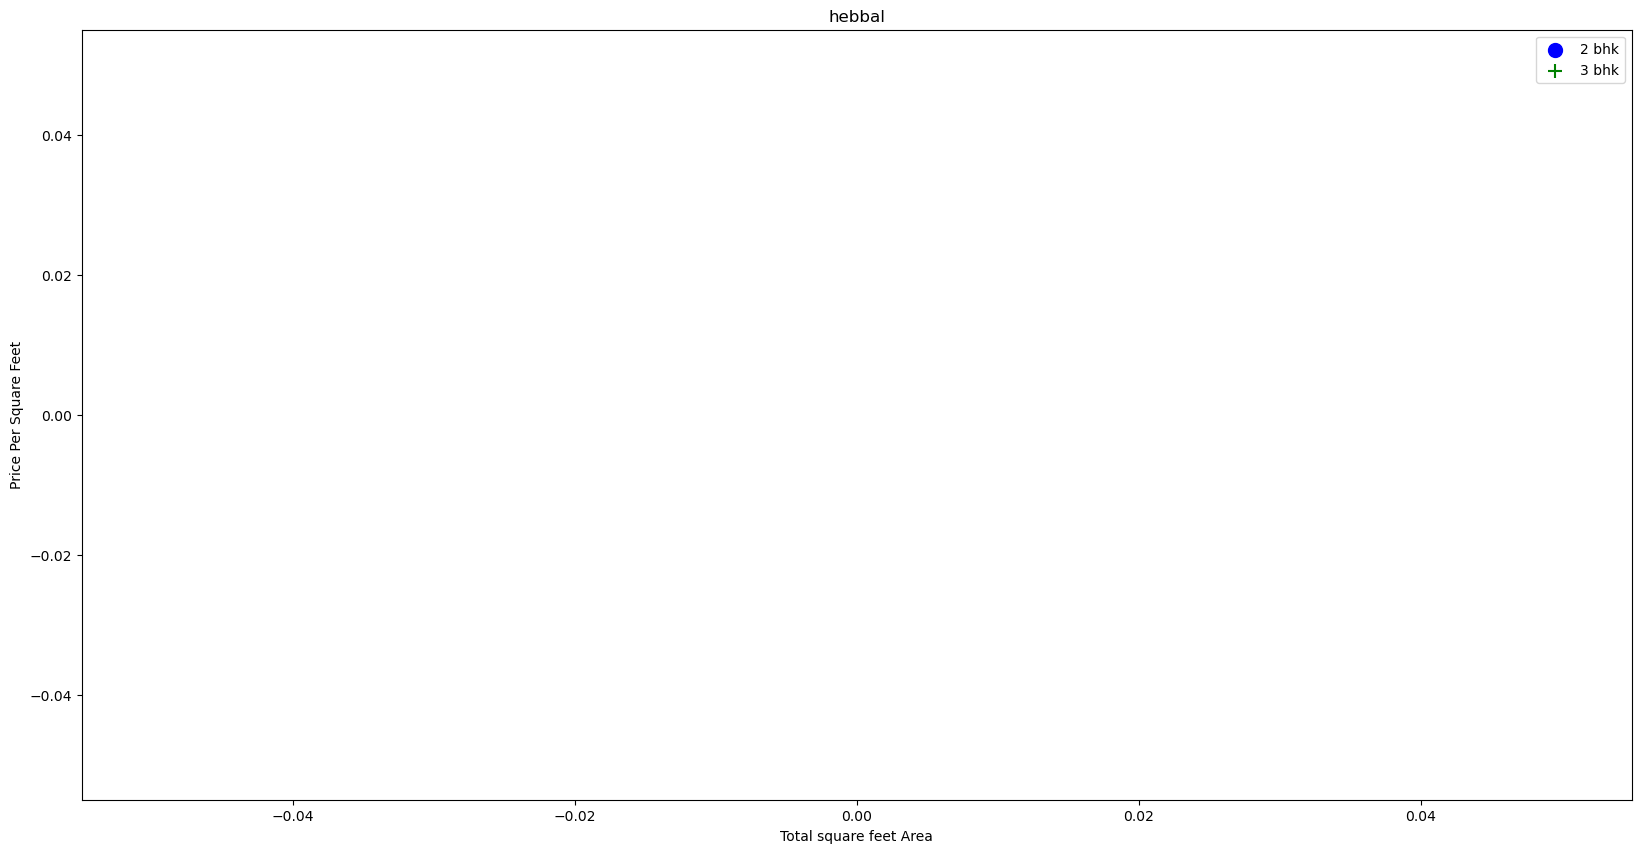

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 bhk',s=100)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 bhk',s=100)
    plt.xlabel("Total square feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,'hebbal')

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df3 = remove_bhk_outliers(df2)

In [40]:
df3.shape


(8032, 7)

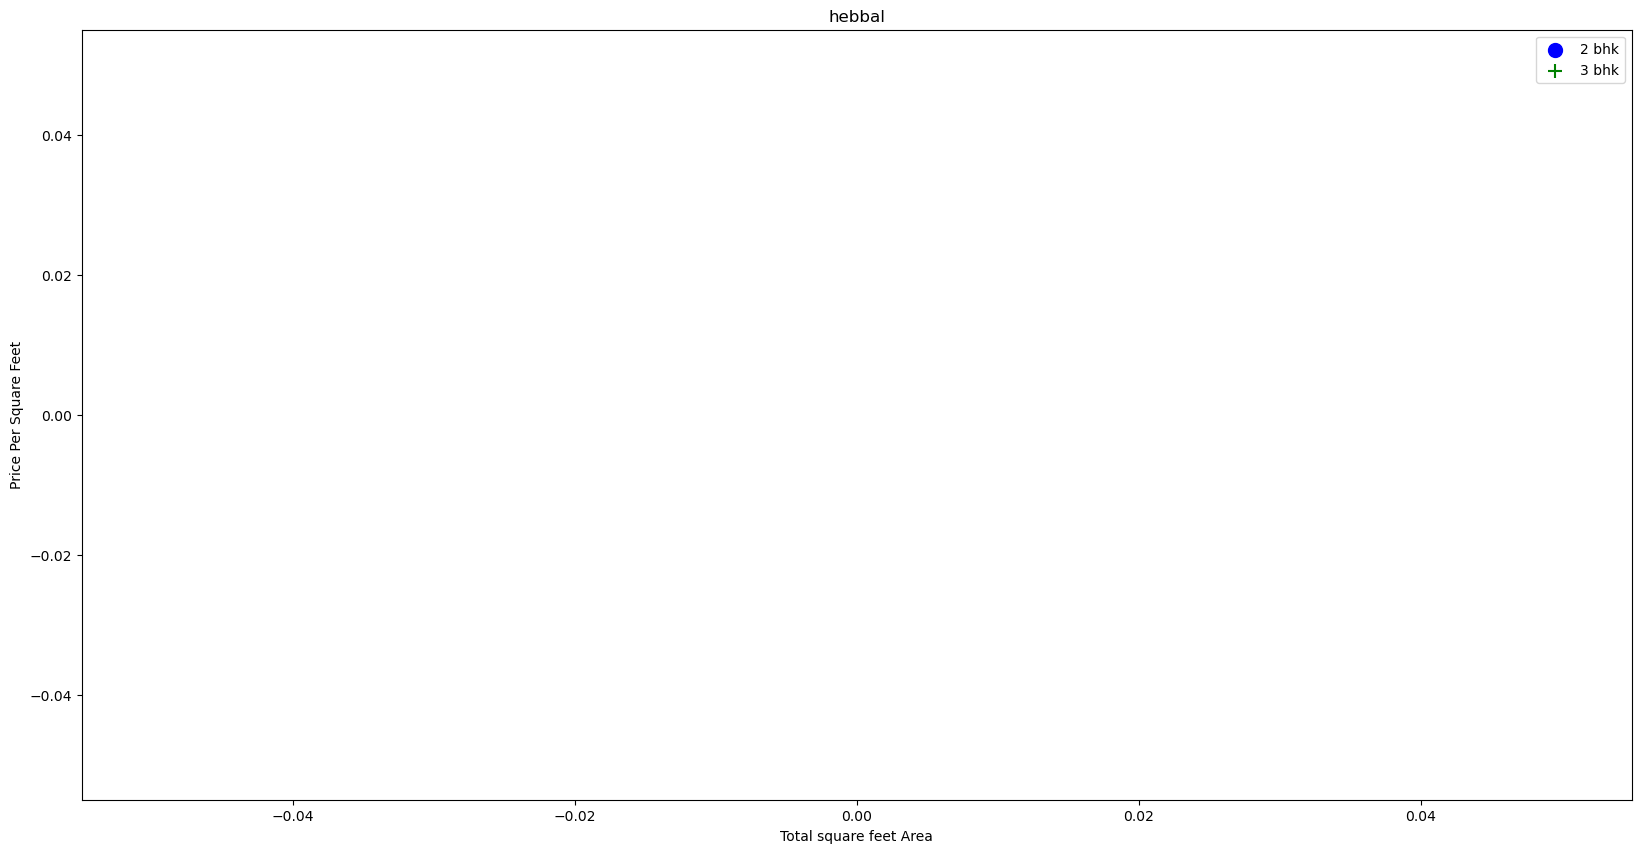

In [41]:
plot_scatter_chart(df3,'hebbal')

Text(0, 0.5, 'Count')

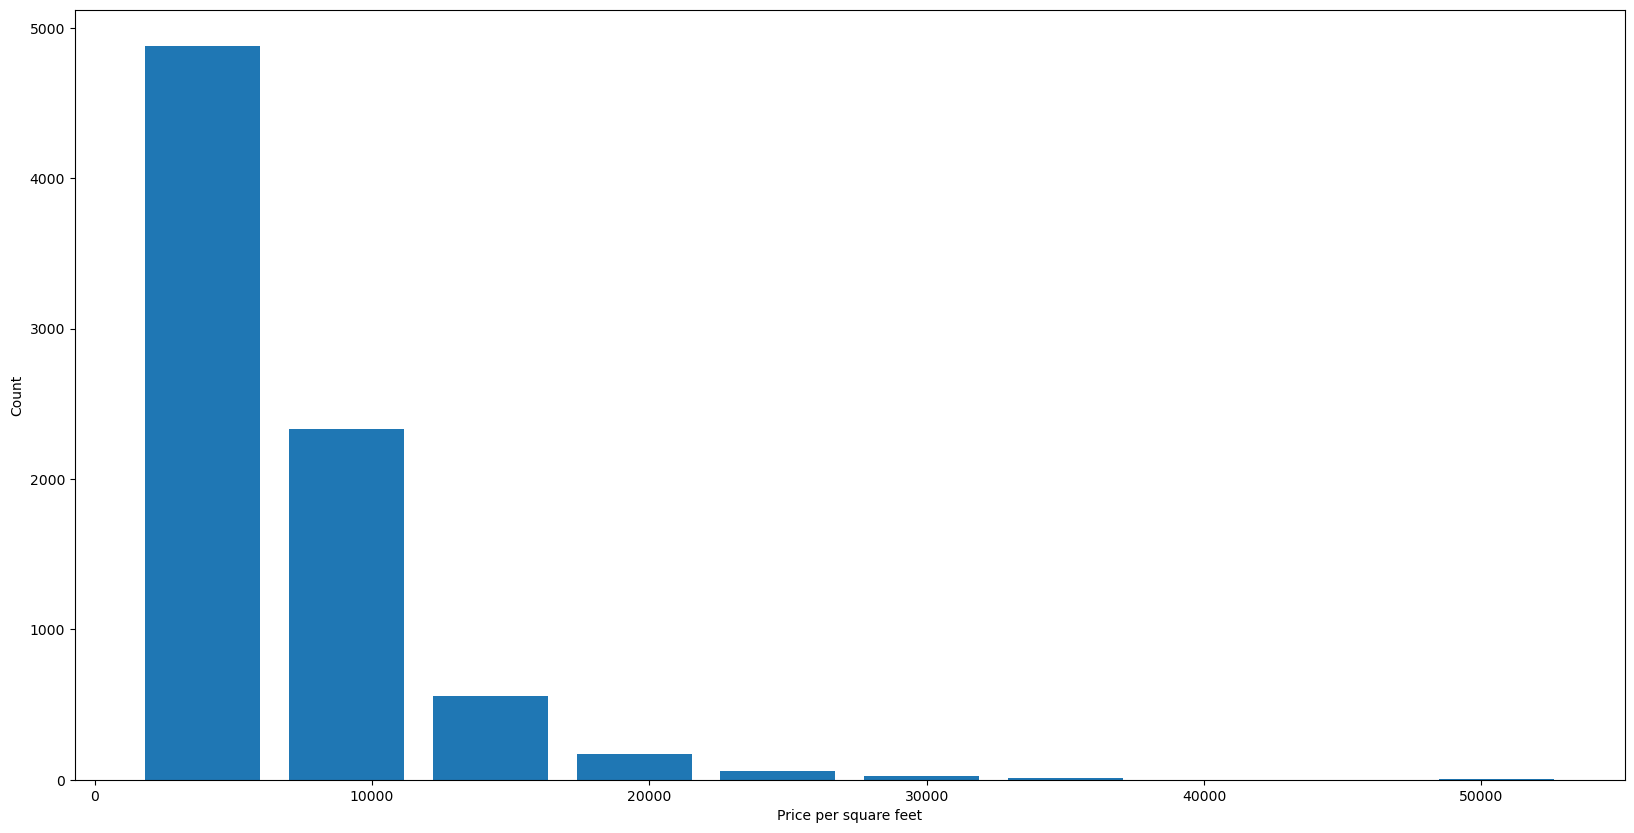

In [42]:
import matplotlib
matplotlib.rcParams['figure.figsize'] =(20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [43]:
df3[df3.bath>df3.bhk+2]

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
1641,Plot Area,Chamrajpet,1500.0,9.0,230.0,6.0,15333.333333
1778,Built-up Area,Chikkabanavar,2460.0,7.0,80.0,4.0,3252.032520
5634,Built-up Area,Nagasandra,7000.0,8.0,450.0,4.0,6428.571429
7268,Super built-up Area,Thanisandra,1806.0,6.0,116.0,3.0,6423.034330
8858,Plot Area,other,3300.0,14.0,500.0,9.0,15151.515152
9053,Plot Area,other,990.0,12.0,120.0,8.0,12121.212121
10354,Plot Area,other,1850.0,12.0,300.0,8.0,16216.216216
10739,Plot Area,other,2400.0,6.0,775.0,3.0,32291.666667
11412,Plot Area,other,7150.0,13.0,3600.0,10.0,50349.650350


In [44]:
df4 = df3[df3.bath<df3.bhk+2]

In [45]:
df4.head()

,area_type,location,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4.0,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3.0,11901.840491
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,125.0,6.0,10416.666667
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3.0,12533.333333
4,Plot Area,1st Block Jayanagar,930.0,4.0,85.0,7.0,9139.784946


In [46]:
df4.bath = df4.bath.astype('int64')
df4.bhk = df4.bhk.astype('int64')

C:\Users\namgy\AppData\Local\Temp\ipykernel_1480\4071305173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.bath = df4.bath.astype('int64')
C:\Users\namgy\AppData\Local\Temp\ipykernel_1480\4071305173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.bhk = df4.bhk.astype('int64')


In [47]:
df4.drop(['area_type','price_per_sqft'],axis=1 ,inplace= True)

C:\Users\namgy\AppData\Local\Temp\ipykernel_1480\436605585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(['area_type','price_per_sqft'],axis=1 ,inplace= True)


In [48]:
df4.corr()

,total_sqft,bath,price,bhk
total_sqft,1.000000,0.559633,0.786791,0.508484
bath,0.559633,1.000000,0.466572,0.907304
price,0.786791,0.466572,1.000000,0.432739
bhk,0.508484,0.907304,0.432739,1.000000


<AxesSubplot:>

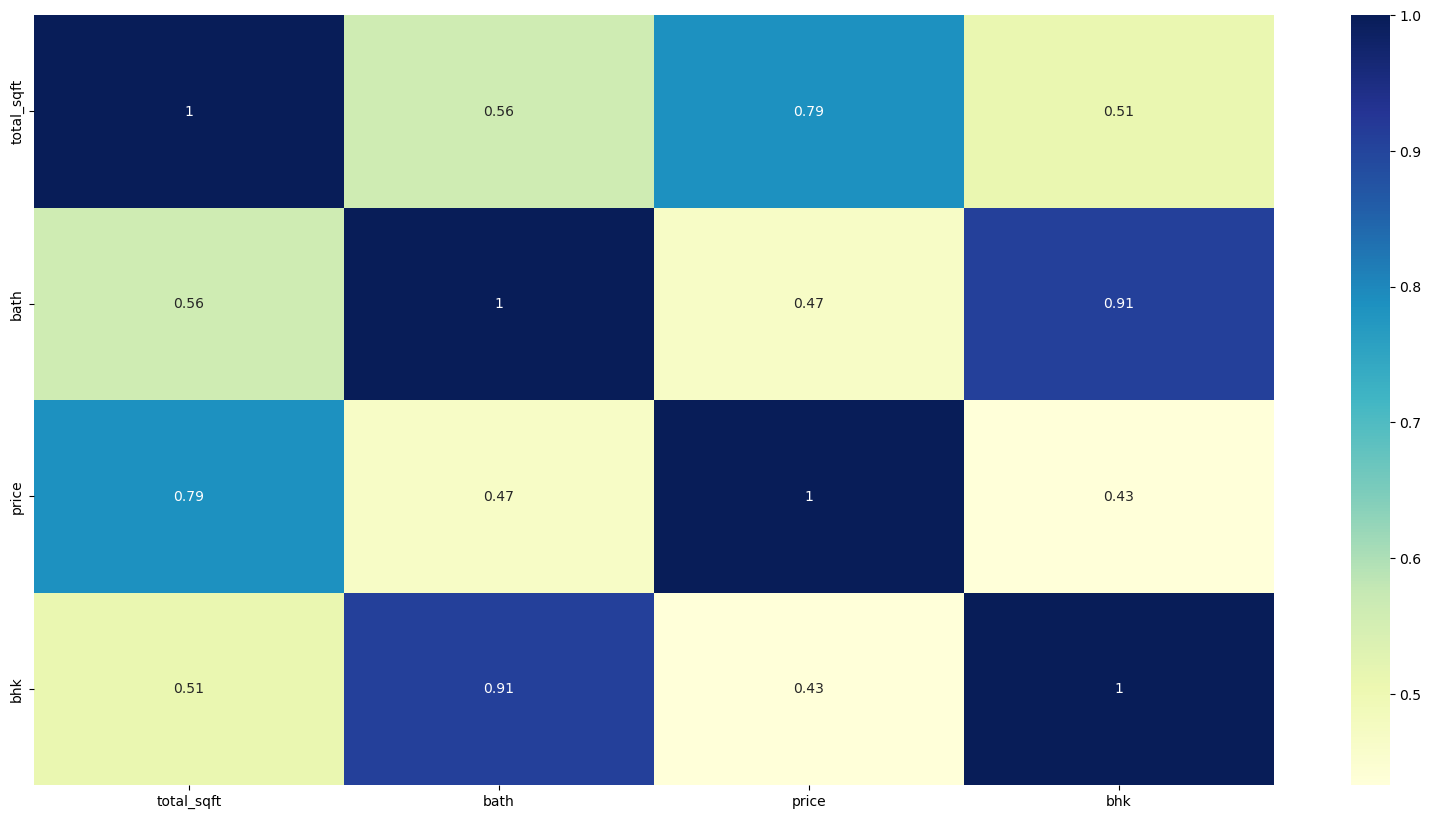

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(df4.corr(),annot=True ,cmap='YlGnBu')

In [50]:
dummies = pd.get_dummies(df4.location)

In [51]:
df4 = pd.concat([df4,dummies.drop('other',axis='columns')],axis='columns')

In [52]:
df4.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df4.drop(['location'],axis=1 ,inplace= True)


In [54]:
df4.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X = df4.drop('price',axis=1)
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11466,1400.0,7,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11469,1353.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11470,812.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11473,1200.0,5,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df4.price
y

0        428.0
1        194.0
2        125.0
3        235.0
4         85.0
         ...  
11466    218.0
11469    110.0
11470     26.0
11473    325.0
11474    400.0
Name: price, Length: 7930, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state =10)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7102059963298492

In [59]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5 , test_size = 0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.79200453, 0.70233477, 0.68849842, 0.64956335, 0.64248549])

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

C:\Users\namgy\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\namgy\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear_regression,0.694977,{'normalize': False}
1,decision_tree,0.598498,"{'criterion': 'mse', 'splitter': 'best'}"
2,lasso,0.610707,"{'alpha': 1, 'selection': 'cyclic'}"


In [61]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]    

In [62]:
import pickle
with open('home_price_model_pickle','wb')as f:
    pickle.dump(lr,f)

In [63]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w')as f:
    f.write(json.dumps(columns))